In [1]:
%load_ext pyinstrument
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
import ariel_load
import tqdm
import copy

local


In [2]:
data=kgs.dill_load(kgs.temp_dir + 'evaluate_model_Baseline__1099.pickle')

In [3]:
inferred_data=data[0]
train_data=data[1]
y_true,y_pred,cov_pred = kgs.data_to_mats(inferred_data,train_data)

In [4]:
base_score = kgs.score_metric_fast(y_true,y_pred,cov_pred)
base_score

0.6525501552765497

100%|██████████████████████████████████████████████████████████████████████████████| 1099/1099 [00:05<00:00, 191.04it/s]


0.000778769309703442

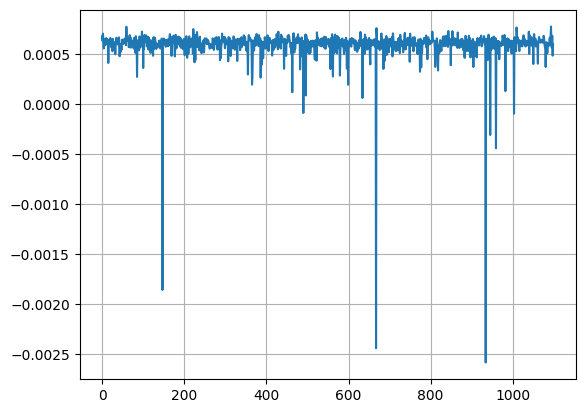

In [5]:
# Replace some by  mean
mean = cp.mean(y_pred,0)
sigma = cp.std(y_pred,0)
res = []
for ii in tqdm.tqdm(range(y_pred.shape[0])):
    y_pred_altered = copy.deepcopy(y_pred)
    cov_pred_altered = copy.deepcopy(cov_pred)
    y_pred_altered[ii,:] = mean
    cov_pred_altered[ii,:,:] = cp.diag(sigma**2)
    res.append(base_score - kgs.score_metric_fast(y_true,y_pred_altered,cov_pred_altered))

plt.figure()
plt.plot(res)
plt.grid(True)

np.max(res)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 105.63it/s]


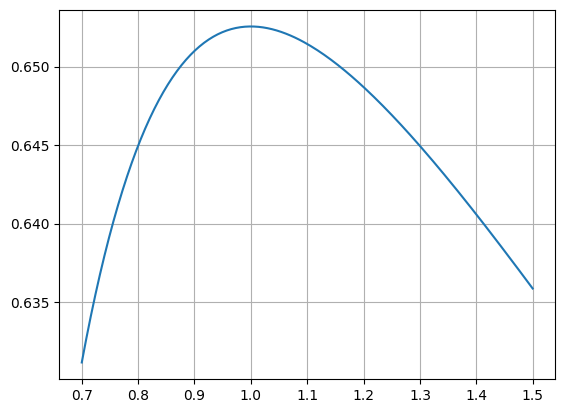

In [6]:
sigma_vals = np.linspace(0.7,1.5,200)
res = []
for s in tqdm.tqdm(sigma_vals):
    y_pred_altered = copy.deepcopy(y_pred)
    cov_pred_altered = copy.deepcopy(cov_pred)
    cov_pred_altered *= s**2
    res.append(kgs.score_metric_fast(y_true,y_pred_altered,cov_pred_altered))

plt.figure()
plt.plot(sigma_vals,res)
plt.grid(True)

In [13]:
model = copy.deepcopy(data[2])
print(model.bias_a, model.bias_b)
model.bias_a = [1,1]
# model.bias_b[0] = 0
# model.bias_b[1] = 0
# model.adjust_based_on_u = [0,0]
inferred_data_nobias = model.infer(train_data)
base_score-kgs.score_metric(inferred_data_nobias, train_data)[0]

[1.0000389234765845, 0.9992683696884602] [6.763030441687455e-05, 0.00017383451557695525]
Score:           0.6506
RMS error FGS:   177.14963 ppm
mRMS error FGS:  47.27581 ppm
RMS error AIRS:  143.69228 ppm
mRMS error AIRS: 43.85683 ppm
RMS error AIRSv: 55.94862 ppm
mRMS error AIRSv:26.69370 ppm


0.0019023887648991211